In [16]:
import torch

torch.version.__version__

In [17]:
import pandas as pd  # Import the Pandas library for data manipulation.

# Define the input file name as a variable for easy modification.
input_file = 'output_results.csv'

# Read the CSV data from the specified input file into a Pandas DataFrame.
csv_data = pd.read_csv(input_file)

# Display the first few rows of the DataFrame to inspect the data.
csv_data.head()

,H,B,q,R_int,gamma,Su,sf_lower,sf_upper
0,8,4,10,0.6,18,25,1.041,1.087
1,8,4,10,0.8,18,25,1.044,1.087
2,6,20,20,0.8,18,25,1.045,1.080
3,6,20,20,0.6,18,25,1.047,1.080
4,6,20,20,1.0,18,25,1.048,1.080


## Preparing Data

In [36]:
from torch.utils.data import Dataset
import numpy as np
import math


class MyDataset(Dataset):
    """
    Class to read the dataset and place it in tensorial form
      Params: Dataset: Training and testing dataset
      """

    def __init__(self, file_name, train_test_ratio=0.9, test=False):
        _df = pd.read_csv(file_name)

        if test:
            data_len = math.floor((1 - train_test_ratio) * len(_df.iloc[:, 0]))
        else:
            data_len = math.floor(train_test_ratio * len(_df.iloc[:, 0]))

        x = _df.iloc[:data_len, :-2].values
        y = _df.iloc[:data_len, -2:].values

        self.x_data = torch.tensor(x, dtype=torch.float32)
        self.y_data = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return np.shape(self.y_data)[0]

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]


In [37]:
# Create a training dataset from the input CSV file.
train_dataset = MyDataset(input_file)

# Create a testing dataset from the input CSV file.
test_dataset = MyDataset(input_file, test=True)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)  # Reproducible

# Explanation:
# - PyTorch uses random numbers in various operations, such as weight initialization, data shuffling, and more.
# - By setting the random seed to a specific value (in this case, 1), we ensure that the same random numbers are generated every time we run the code.
# - This is important for reproducibility, which means getting the same results each time you run the code.
# - Reproducibility is crucial in machine learning and deep learning to validate and compare results.

# Note: Setting the random seed to 1 is just an example. You can choose any integer value for reproducibility.

In [43]:
# Number of training epochs
EPOCH = 10

# Batch size for mini-batch gradient descent
BATCH_SIZE = 10

# Learning rate for the optimization algorithm (e.g., stochastic gradient descent)
LR = 0.001

In [44]:
from torch.utils.data import DataLoader

# Create a data loader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Create a data loader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [45]:
# Obtain a single batch of training data and labels using the `train_loader`.
# This is done by using the `next` function on an iterator created from `train_loader`.
train_features, train_labels = next(iter(train_loader))

# Print the shape of the feature batch.
# `train_features.size()` returns the shape (dimensions) of the feature batch.
print(f"Feature batch shape: {train_features.size()}")

# Print the shape of the label batch.
# `train_labels.size()` returns the shape (dimensions) of the label batch.
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([10, 6])
Labels batch shape: torch.Size([10, 2])


In [46]:
import torch as T
import torch.nn

class MultipleLinearRegression(T.nn.Module):
    def __init__(self, input=6, output=2):
        super(MultipleLinearRegression, self).__init__()
        
        # Define the layers of the neural network.
        # Three fully connected layers are used: hid1, hid2, and oupt.
        self.hid1 = T.nn.Linear(input, 6)  # Layer with 6 units, input features to 6 units.
        self.hid2 = T.nn.Linear(6, 6)     # Layer with 6 units, 6 units to 6 units.
        self.oupt = T.nn.Linear(6, output)  # Output layer, 6 units to 'output' units.

        # Initialize the weights and biases of each layer.
        T.nn.init.xavier_uniform_(self.hid1.weight)  # Xavier initialization of weights for hid1.
        T.nn.init.zeros_(self.hid1.bias)            # Initialize biases of hid1 to zeros.
        T.nn.init.xavier_uniform_(self.hid2.weight)  # Xavier initialization of weights for hid2.
        T.nn.init.zeros_(self.hid2.bias)            # Initialize biases of hid2 to zeros.
        T.nn.init.xavier_uniform_(self.oupt.weight)  # Xavier initialization of weights for oupt.
        T.nn.init.zeros_(self.oupt.bias)            # Initialize biases of oupt to zeros.

    def forward(self, x):
        # Define the forward pass of the neural network.
        
        # Apply the sigmoid activation function to the hidden layers 'hid1' and 'hid2'.
        z = T.sigmoid(self.hid1(x))
        z = T.sigmoid(self.hid2(z))
        
        # The output layer 'oupt' does not apply an activation function (linear layer).
        z = self.oupt(z)  # no activation
        
        return z

In [47]:
MLR_model = MultipleLinearRegression(6, 2)
print("The parameters: ", list(MLR_model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6476, -0.1308,  0.3987,  0.3062, -0.4571, -0.6013],
        [ 0.6787,  0.0369,  0.4847,  0.1465,  0.2274,  0.5282],
        [ 0.6705, -0.4692,  0.0884,  0.5277,  0.5123,  0.4393],
        [-0.5117, -0.5092, -0.4276,  0.0888,  0.7047, -0.4467],
        [ 0.3768, -0.3914, -0.6648, -0.1503,  0.4074,  0.6565],
        [-0.4391,  0.1535,  0.6101,  0.4686,  0.4407,  0.5025]],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([[ 0.4473,  0.1826, -0.4835, -0.5938, -0.3240, -0.0823],
        [-0.4334,  0.2587,  0.2188, -0.1601,  0.2718,  0.2285],
        [ 0.4317,  0.4762, -0.2395,  0.6909, -0.0817, -0.0243],
        [-0.6674, -0.4551, -0.4131, -0.3024,  0.5027, -0.2311],
        [-0.5284,  0.2721,  0.2264,  0.4580, -0.3659,  0.1533],
        [-0.2574, -0.1589, -0.5635, -0.3223, -0.2166,  0.3024]],
       requires_grad=True), Parameter containing:
tensor([0., 0.

In [48]:
# defining the model optimizer
optimizer = torch.optim.AdamW(MLR_model.parameters(), lr=LR)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

# defining the loss criterion
criterion = torch.nn.MSELoss()


In [49]:
# Check the model gives data (NO TRAINING YET)
x = torch.tensor([8, 6, 10, 1.0, 16, 100])
y_pred = MLR_model(x)
print(y_pred)

tensor([ 1.3146, -0.3314], grad_fn=<ViewBackward0>)


In [50]:
t_losses = []
for epoch in range(EPOCH):
    for i, (inputs, targets) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = MLR_model(inputs)
        loss = criterion(outputs, targets)
        t_losses.append(loss.item())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        # scheduler.step()

        # Print training statistics
        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{EPOCH}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [10/15], Loss: 1.2568
Epoch [2/10], Step [10/15], Loss: 1.1113
Epoch [3/10], Step [10/15], Loss: 0.9838
Epoch [4/10], Step [10/15], Loss: 0.8711
Epoch [5/10], Step [10/15], Loss: 0.7713
Epoch [6/10], Step [10/15], Loss: 0.6829
Epoch [7/10], Step [10/15], Loss: 0.6048
Epoch [8/10], Step [10/15], Loss: 0.5356
Epoch [9/10], Step [10/15], Loss: 0.4741
Epoch [10/10], Step [10/15], Loss: 0.4193


In [51]:
# Evaluate the model on the test data
with torch.no_grad():
    total_loss = 0
    
    # Iterate over batches in the test loader
    for inputs, targets in test_loader:
        outputs = MLR_model(inputs)  # Forward pass to get model predictions
        loss = criterion(outputs, targets)  # Calculate the loss
        
        total_loss += loss.item()  # Accumulate the loss for all batches
    
    mean_loss = total_loss / len(test_loader)  # Calculate the mean loss over all batches
    print(f'Test Loss: {mean_loss:.4f}')

Test Loss: 0.2448


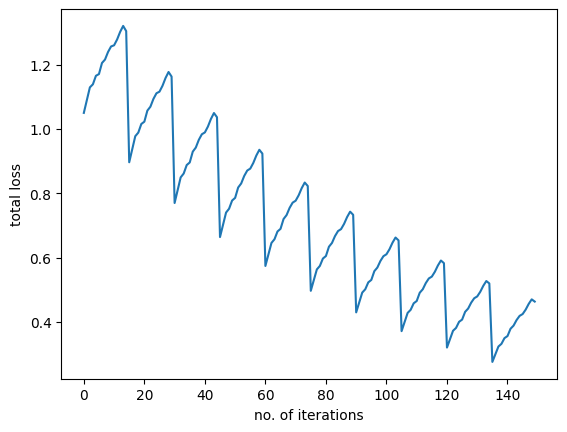

In [52]:
# Plot the training losses
plt.plot(t_losses)
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()

In [63]:
# Testing the model

# Case histories parameters
cases = [
    [2.4, 4.8, 15, 1, 19, 12],  # Fornebu, Oslo
    [5, 5, 0, 1, 19, 16],      # Feria, Oslo
    [11.3, 16, 0, 1, 19, 35]   # Chicago, USA
]


# Case histories outcomes
cases_op = [
    [1.03, 1.11, 0.97, 1.05],  # Fornebu, Oslo
    [1.02, 1.26, 1.03, 1.1],  # Feria, Oslo
    [1, 1.11, 0.95, 1]        # Chicago, USA
]

for i, each_case in enumerate(cases):
    y_pred_MLR = MLR_model(torch.Tensor(each_case))
    val = float(np.average(y_pred_MLR.detach()))
    cases_op[i].append(val)


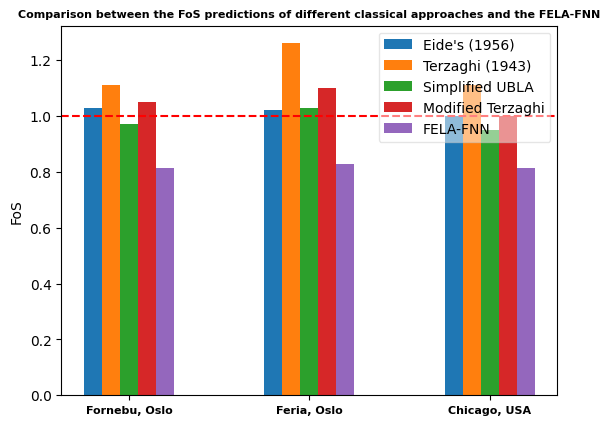

In [64]:
import numpy as np
import matplotlib.pyplot as plt

species = ('Fornebu, Oslo', 'Feria, Oslo', 'Chicago, USA')

means = {
    "Eide's (1956)": [],
    "Terzaghi (1943)": [],
    "Simplified UBLA": [],
    "Modified Terzaghi": [],
    "FELA-FNN": []
}

# Assuming you have 'cases_op' defined elsewhere

for i, items in enumerate(means.items()):
    means[items[0]] += ([x[i] for x in cases_op])

x = np.arange(len(species))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('FoS')

# Adjust the x-axis tick positions and labels
new_x = x + width * (len(means) - 1) / 2
ax.set_xticks(new_x)
ax.set_xticklabels(species, rotation=0, ha='center', fontsize=8, fontweight='bold')  # Adjust 'ha' to 'center'

# Adjust the legend location to 'upper right' and specify the number of columns (ncols)
legend = ax.legend(loc='upper right', ncols=1)

# Set the transparency of the legend background to 50%
legend.get_frame().set_alpha(0.5)

ax.axhline(y=1, color='red', linestyle='--', label='Y = 1')

# Set the chart title with a customizable font size
chart_title = "Comparison between the FoS predictions of different classical approaches and the FELA-FNN"
title_fontsize = 8  # You can adjust the font size as needed
ax.set_title(chart_title, fontsize=title_fontsize, fontweight='bold')  # Make the title bold

# Increase figure quality by adjusting the DPI
plt.savefig('your_figure_600_2.png', dpi=600)  # You can adjust the filename and DPI as needed

plt.show()